# Importing Libraries

In [63]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Reading csv File

In [135]:
df= pd.read_csv('student_extended_ml_dataset2.csv')

In [65]:
df.head(5)

,Name,Age,Gender,Hours_Studied,IQ,Physics_Marks,Math_Marks,Chemistry_Marks,Has_Part_Time_Job,Study_Hours_Group
0,Jason Vargas,19,Male,8.140821,92,87,43,85,True,High
1,Sandra Wiggins,35,Female,9.825626,112,86,81,54,False,High
2,Julia Olsen,33,Male,8.835372,131,87,52,57,True,High
3,Robert Pennington,33,Male,2.482483,138,70,86,83,False,Low
4,Kayla Sellers,28,Female,4.419793,90,95,48,83,True,Low


In [66]:
df.describe()

,Age,Hours_Studied,IQ,Physics_Marks,Math_Marks,Chemistry_Marks
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,31.444800,5.499279,114.915200,70.311000,69.816000,69.798800
std,8.148388,2.588333,20.551839,17.753538,17.536626,17.487913
min,18.000000,1.002452,80.000000,40.000000,40.000000,40.000000
25%,24.000000,3.258910,97.000000,55.000000,54.000000,55.000000
50%,32.000000,5.474256,115.000000,71.000000,70.000000,70.000000
75%,38.000000,7.726088,133.000000,86.000000,85.000000,85.000000
max,45.000000,9.999925,150.000000,100.000000,100.000000,100.000000


1. No null values in the dataset.
2. Mean, standard deviation and median indicate that there are no outliers in the dataset.

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5000 non-null   object 
 1   Age                5000 non-null   int64  
 2   Gender             5000 non-null   object 
 3   Hours_Studied      5000 non-null   float64
 4   IQ                 5000 non-null   int64  
 5   Physics_Marks      5000 non-null   int64  
 6   Math_Marks         5000 non-null   int64  
 7   Chemistry_Marks    5000 non-null   int64  
 8   Has_Part_Time_Job  5000 non-null   bool   
 9   Study_Hours_Group  5000 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(3)
memory usage: 356.6+ KB


Taking the average of marks and adding a column 'avg_marks' to the dataset

In [155]:
df['avg_marks']=(df.Physics_Marks+df.Math_Marks+df.Chemistry_Marks)/3

# Exploratory Data Analysis

<Axes: xlabel='Has_Part_Time_Job', ylabel='count'>

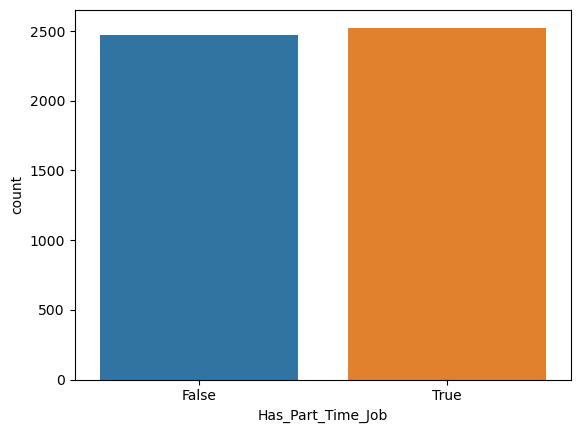

In [69]:
sns.countplot(x='Has_Part_Time_Job',data=df)

<Axes: xlabel='Study_Hours_Group', ylabel='count'>

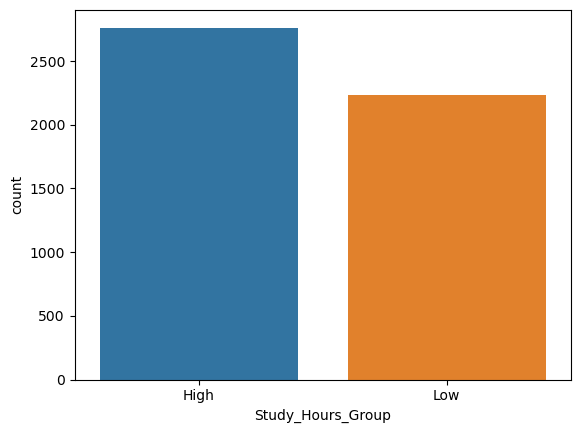

In [70]:
sns.countplot(x='Study_Hours_Group',data=df)

<Axes: xlabel='Gender', ylabel='count'>

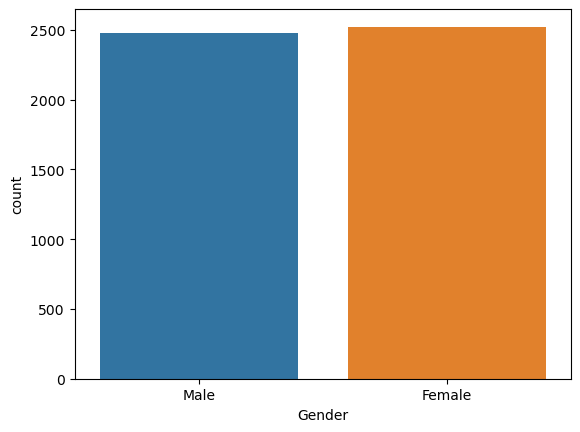

In [71]:
sns.countplot(x='Gender',data=df)

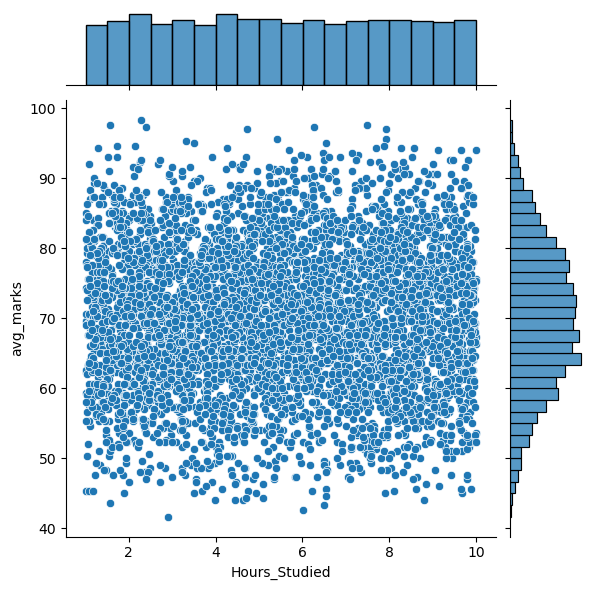

In [72]:
sns.jointplot(x='Hours_Studied',y='avg_marks',data=df)

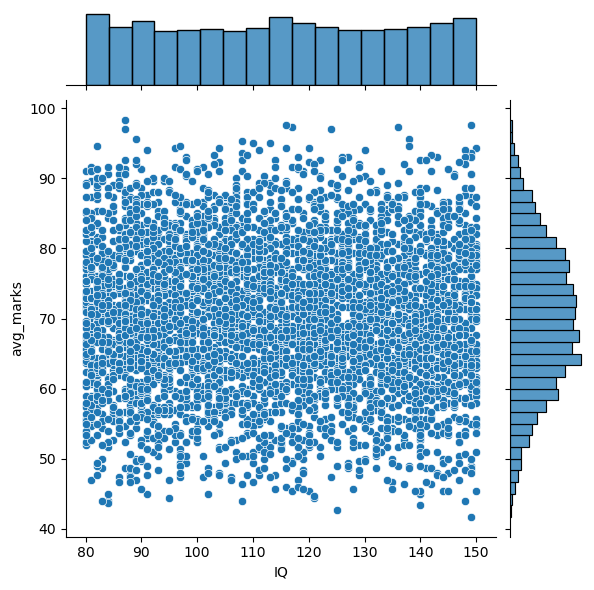

In [73]:
sns.jointplot(x='IQ',y='avg_marks',data=df)

In [74]:
df.corr()

C:\Users\Rytham\AppData\Local\Temp\ipykernel_17020\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Hours_Studied,IQ,Physics_Marks,Math_Marks,Chemistry_Marks,Has_Part_Time_Job,avg_marks
Age,1.000000,0.017165,-0.013193,0.010405,-0.010184,-0.009024,0.000387,-0.004988
Hours_Studied,0.017165,1.000000,-0.010782,-0.001311,0.005998,-0.000587,0.002944,0.002356
IQ,-0.013193,-0.010782,1.000000,-0.011610,0.000631,-0.027027,0.005901,-0.021953
Physics_Marks,0.010405,-0.001311,-0.011610,1.000000,0.000443,-0.001516,0.005244,0.583113
Math_Marks,-0.010184,0.005998,0.000631,0.000443,1.000000,-0.004683,-0.014587,0.574163
Chemistry_Marks,-0.009024,-0.000587,-0.027027,-0.001516,-0.004683,1.000000,0.013749,0.571411
Has_Part_Time_Job,0.000387,0.002944,0.005901,0.005244,-0.014587,0.013749,1.000000,0.002557
avg_marks,-0.004988,0.002356,-0.021953,0.583113,0.574163,0.571411,0.002557,1.000000


C:\Users\Rytham\AppData\Local\Temp\ipykernel_17020\170879243.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(),annot=True,cmap='coolwarm')


<Axes: >

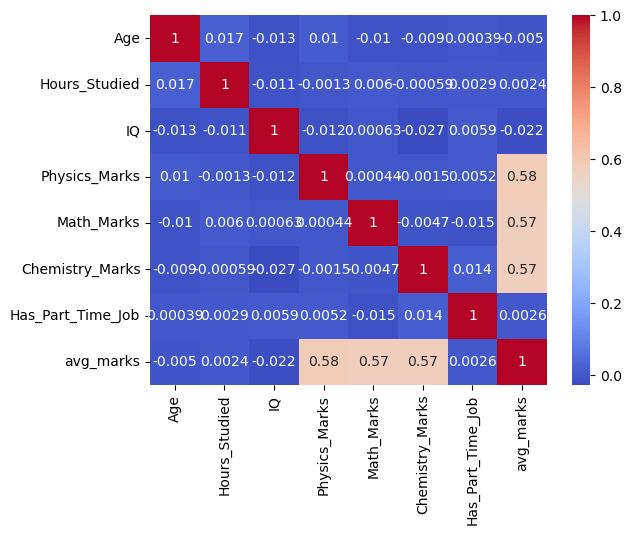

In [75]:
sns.heatmap(data=df.corr(),annot=True,cmap='coolwarm')

# Creating Dummy Variables 

In [137]:
Pt=pd.get_dummies(df['Has_Part_Time_Job'])
dpt=pd.DataFrame(Pt)
df['Part_time']=dpt[True]

In [138]:
sg=pd.get_dummies(df['Study_Hours_Group'])
dsg=pd.DataFrame(sg)
df['SHG']=dsg['High']

In [189]:
df.head()

,Name,Age,Gender,Hours_Studied,IQ,Physics_Marks,Math_Marks,Chemistry_Marks,Has_Part_Time_Job,Study_Hours_Group,Part_time,SHG,avg_marks
0,Jason Vargas,19,Male,8.140821,92,87,43,85,True,High,1,1,71.666667
1,Sandra Wiggins,35,Female,9.825626,112,86,81,54,False,High,0,1,73.666667
2,Julia Olsen,33,Male,8.835372,131,87,52,57,True,High,1,1,65.333333
3,Robert Pennington,33,Male,2.482483,138,70,86,83,False,Low,0,0,79.666667
4,Kayla Sellers,28,Female,4.419793,90,95,48,83,True,Low,1,0,75.333333


# Train_Test Split

In [156]:
X= df[['Hours_Studied',"IQ","SHG","Part_time"]]
y= df['avg_marks']

In [157]:
from sklearn.model_selection import train_test_split

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Model Selection 

In [159]:
from sklearn.linear_model import LinearRegression

In [160]:
lm = LinearRegression()

In [161]:
lm.fit(X_train,y_train)

LinearRegression()

# Prediction

In [163]:
pred_y = lm.predict( X_test)

In [182]:
prediction=pd.DataFrame(pred_y)

In [183]:
prediction["Predicted Marks"]=pd.DataFrame(pred_y)

In [184]:
prediction['Actual Marks']=pd.DataFrame(df['avg_marks']) #Comparing predicted marks with actual marks

In [185]:
del prediction[0]

In [186]:
prediction

,Predicted Marks,Actual Marks
0,69.888242,71.666667
1,70.038119,73.666667
2,70.200014,65.333333
3,69.928621,79.666667
4,69.646643,75.333333
...,...,...
995,69.585213,82.333333
996,70.099788,79.666667
997,70.126201,72.000000
998,69.979827,77.333333


# Evaluation

In [187]:
from sklearn.metrics import mean_absolute_error

In [188]:
print('Mean absolute error: ',mean_absolute_error(y_test,pred_y))

Mean absolute error:  8.374280667875482
